Page 121

# Chapter 3

### Exercise 8

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
auto = sm.datasets.get_rdataset('Auto', package='ISLR').data
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [31]:
auto.shape

(392, 9)

In [32]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [45]:
# Using the R-styles formulas with statsmodel.formula.api
model = ols('mpg ~ horsepower', data=auto).fit()

# Print summary stats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           7.03e-81
Time:                        19:40:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

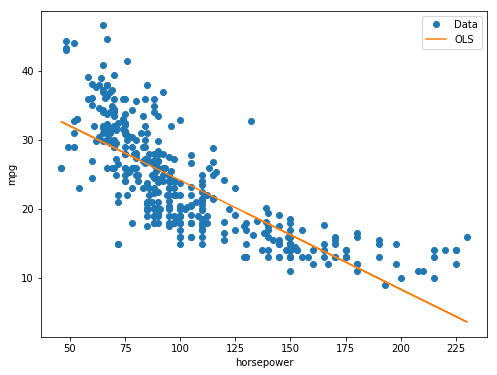

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(auto['horsepower'], auto['mpg'], 'o', label='Data')
ax.plot(auto['horsepower'], model.fittedvalues, label='OLS')
plt.xlabel('horsepower')
plt.ylabel('mpg')
ax.legend(loc='best')
plt.show()

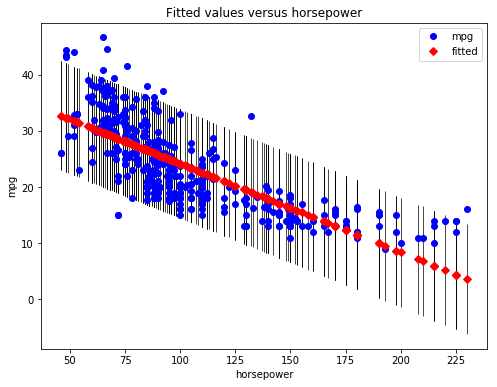

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sm.graphics.plot_fit(model, 'horsepower', ax=ax)

1. There is statisticaly significant relationship between `mpg` and `horsepower`: $p$-value is less than `0.05` and $F$-statistic is a large value. This means we can reject the null hypothesis $H_0$ that there is no relationship.
2. $R_2$ is `0.606`, meaning `60.6%` of variability in `Y = mpg` is explained by `X = horsepower`. (see MSE below)
2. Negative. Coeff is negative. As `horsepower` increases, `mpg` decreases.

In [88]:
# Mean squared error (MSE)
model.mse_resid

24.06645095367287

(iv)....

In [94]:
pred = model.predict(auto[auto['horsepower'] == 98])
print(pred)

180    24.467077
229    24.467077
dtype: float64


In [102]:
pred.std

<bound method Series.std of 180    24.467077
229    24.467077
dtype: float64>

In [86]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2019-02-06 22:43 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omn